In [1]:
# Generate LDA histograms and reconstructions

In [2]:
!date

Thu Apr 27 10:18:44 PDT 2023


In [3]:
!which python

/home/matheus.viana/anaconda3/envs/lab-variance/bin/python


In [4]:
!pip list | grep cvapipe

cvapipe-analysis           0.1.0                                                         /allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis


In [5]:
import os
import sys
import pickle
import importlib
import concurrent
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm
from skimage import io as skio
import matplotlib.pyplot as plt
from aicscytoparam import cytoparam
from sklearn.decomposition import PCA
from aicsshparam import shtools, shparam
from aicsimageio import AICSImage
from aicsimageio.writers import OmeTiffWriter
from cvapipe_analysis.tools import io, viz, general, controller, shapespace, plotting

sys.path.insert(1, '../tools')
import common

In [6]:
# Controller form cvapipe_analysis
staging = Path("/allen/aics/assay-dev/MicroscopyOtherData/Viana/datasets/AbbyCardios/staging_pca9")
config = general.load_config_file(staging)
control = controller.Controller(config)
device = io.LocalStagingIO(control)
df = device.load_step_manifest("preprocessing")
print(df.shape, control.get_staging())

(147, 1218) /allen/aics/assay-dev/MicroscopyOtherData/Viana/datasets/AbbyCardios/staging_pca9


In [7]:
space = shapespace.ShapeSpace(control)
space.execute(df)

In [8]:
# local_staging_variance_edges is generated by using the output dataframe from the
# mapping process to filter out not matched cells from the full dataset.
dsname = "pca62"
datasets = {
    dsname: {
        "control": "/allen/aics/assay-dev/MicroscopyOtherData/Viana/datasets/AbbyCardios/staging_pca9",
        "perturbed": "/allen/aics/assay-dev/MicroscopyOtherData/Viana/datasets/AbbyCardios/staging_pca62"
    }}

In [9]:
smapper = shapespace.ShapeSpaceMapper(space, output_folder="./")
smapper.use_full_base_dataset()
smapper.set_make_plots_off()
smapper.set_distance_threshold(1e10)
smapper.map(datasets)
df_map = smapper.result
df_map.head()

	pca62 loaded. (138, 1218)


NUC_MEM_PC1  Dist  SelfDist NNCellId  Match  \
dataset structure_name CellId                                                  
base    ADH            067j0pix     0.014331   NaN       NaN       -1  False   
                       32asvegl     0.130543   NaN       NaN       -1  False   
                       3gp9pks0     0.992096   NaN       NaN       -1  False   
                       466dclnw     0.700845   NaN       NaN       -1  False   
                       4731xeaf     0.327921   NaN       NaN       -1  False   

                                 pca62  
dataset structure_name CellId           
base    ADH            067j0pix   True  
                       32asvegl  False  
                       3gp9pks0  False  
                       466dclnw  False  
                       4731xeaf  False

### Control and Device for each shape matched dataset (control and perturbed)

In [10]:
dsmanagers = common.setup_cvapipe_for_matched_dataset(datasets[dsname])

### Load representations and compute PCA and compute LDA

In [11]:
importlib.reload(common)
pca_lda = common.run_lda_analysis(df_map=df_map, managers=dsmanagers, return_pca_lda_objs=True)

Running dataset: pca62


  0%|          | 0/20 [00:00<?, ?it/s]

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The de

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)


  0%|          | 0/46 [00:00<?, ?it/s]

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The de

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The de

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The de

mean rep: ct=0.02406010026097895, (20), pt=0.012269765869961135, (46)


  0%|          | 0/20 [00:00<?, ?it/s]

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The de

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)


  0%|          | 0/46 [00:00<?, ?it/s]

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The de

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The de

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The de

mean rep: ct=0.01597519761176095, (20), pt=0.016212899070451255, (46)


  0%|          | 0/20 [00:00<?, ?it/s]

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The de

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)


  0%|          | 0/46 [00:00<?, ?it/s]

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The de

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The de

/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)
/home/matheus.viana/anaconda3/envs/lab-variance/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The de

mean rep: ct=0.03834578772460149, (20), pt=0.026749812041276633, (46)


### Loading and voxelizing matched shape

In [12]:
nisos = control.get_number_of_interpolating_points()
inner_alias = control.get_inner_most_alias_to_parameterize()
fname = f"avgshape/{dsname}_{inner_alias}_matched.vtk"
inner_mesh = device.read_vtk_polydata(fname)
outer_alias = control.get_outer_most_alias_to_parameterize()
fname = f"avgshape/{dsname}_{outer_alias}_matched.vtk"
outer_mesh = device.read_vtk_polydata(fname)
domain, origin = cytoparam.voxelize_meshes([outer_mesh, inner_mesh])
coords_param, coeffs_centroid = cytoparam.parameterize_image_coordinates(
    seg_mem=(domain>0).astype(np.uint8),
    seg_nuc=(domain>1).astype(np.uint8),
    lmax=control.get_lmax(), nisos=[nisos, nisos]
)
coeffs_mem, centroid_mem, coeffs_nuc, centroid_nuc = coeffs_centroid
coords_param += np.array(centroid_nuc).reshape(3, 1, 1)-np.array(centroid_mem).reshape(3, 1, 1)

In [13]:
domain_nuc = (255*(domain>1)).astype(np.uint8)
domain_mem = (255*(domain>0)).astype(np.uint8)

In [14]:
mps = [-2,-1.5,-1,-0.5,0,0.5,1,1.5,2]

In [15]:
data = {}
for gene in tqdm(control.get_gene_names()):
    
    reps = common.get_reps_from_lda_walk(pca_lda=pca_lda[gene], mps=mps)
    
    instances = []
    for rep in reps:
        morphed = cytoparam.morph_representation_on_shape(
            img=domain,
            param_img_coords=coords_param,
            representation=rep
        )
        instances.append(np.stack([domain_nuc, domain_mem, morphed], axis=0))
    data[gene] = instances

  0%|          | 0/3 [00:00<?, ?it/s]

In [16]:
importlib.reload(common)

<module 'common' from '/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/notebooks/MovieEdges/../tools/common.py'>

In [17]:
bbox = 400
(yyi, yyf, yzi, yzf), bbox, figargs = common.contact_sheet_params(box_size=bbox, ylow=110, zlow=70)

In [18]:
scale=2
ng = len(control.get_gene_names())
mode = {
    "nuc": "center_nuc",
    "mem": "center_nuc",
    "gfp": "center_nuc"
}
args = {"gridspec_kw": {"hspace": 0, "wspace": 0}, "sharex": "col"}

In [19]:
# Percentil relative to center
contrast = {}
orients = ["z", "y"]
for gene in control.get_gene_names():
    contrast_gene = common.Projector.get_shared_morphed_max_based_on_pct_for_zy_views(
        instances = data[gene],
        pct = 90,
        mode = mode,
        func = np.mean
    )
    vmin, vmax = 0, np.nanmax([contrast_gene[ax][1] for ax in orients])
    contrast[gene] = vmax

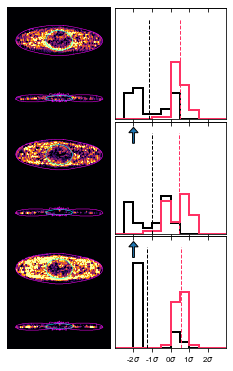

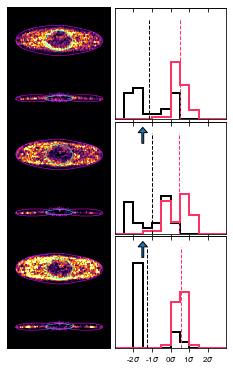

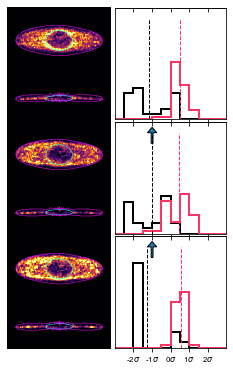

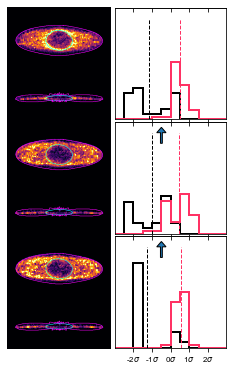

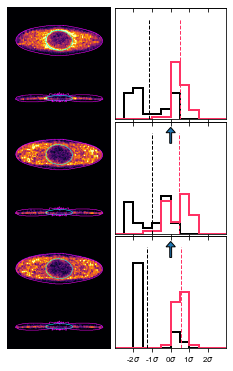

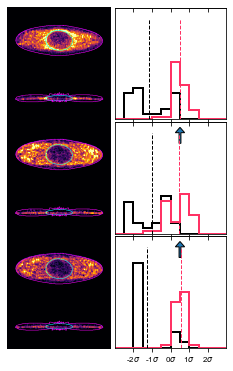

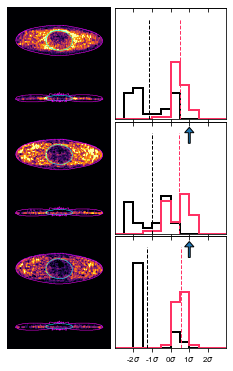

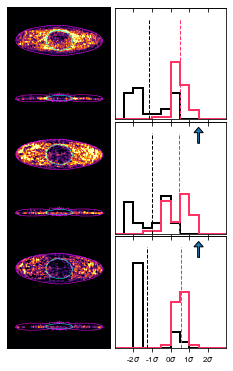

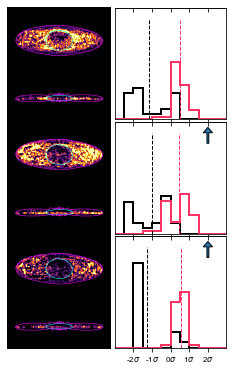

In [20]:
for mpId, mp in enumerate(mps):
    fig, axs = plt.subplots(ng,2, figsize=(2*scale, 1*ng*scale*420/400), **args)
    for gene, (ax1, ax2) in zip(control.get_gene_names(), axs):
        ax1.axis("off")
#         vmin, vmax = common.Projector.get_shared_gfp_range(data[gene], [20,98])
        
        proj = common.Projector(data[gene][mpId], mask_on=True, box_size=bbox, force_fit=True)
        proj.set_projection_mode(ax="z", mode=mode)
        proj.compute()
        pz = proj.projs["gfp"].copy()
        contourz = proj.get_proj_contours()
        proj.set_projection_mode(ax="y", mode=mode)
        proj.compute()
        py = proj.projs["gfp"].copy()
        contoury = proj.get_proj_contours()
        im = np.concatenate([py[yyi:yyf, :], pz[yzi:yzf, :]], axis=0)
        view = ax1.imshow(im, cmap="inferno", origin="lower")
        view.set_clim(0, contrast[gene])
        for alias_cont, alias_color in zip(["nuc", "mem"], ["cyan", "magenta"]):
            if gene in ["LMNB1", "NUP153", "HIST1H2BJ", "SEC61B", "ATP2A2"] and alias_cont=="nuc":
                continue
            [ax1.plot(c[:,1], c[:,0]-yyi, lw=0.5, color=alias_color) for c in contoury[alias_cont]]
            [ax1.plot(c[:,1], c[:,0]+(yyf-yyi)-yzi, lw=0.5, color=alias_color) for c in contourz[alias_cont]]
                    
        common.make_lda_histogram(df=pca_lda[gene]["axes"], ax=ax2, verbose=False)
        if gene != control.get_gene_names()[0]:
            ax2.arrow(mp, 1.7, 0, dy=0.2, width=0.1, head_length=0.1, head_width=0.5)
    plt.savefig(f"MovieEdgesLDS_mp{mpId}.png", dpi=150)
    plt.show()